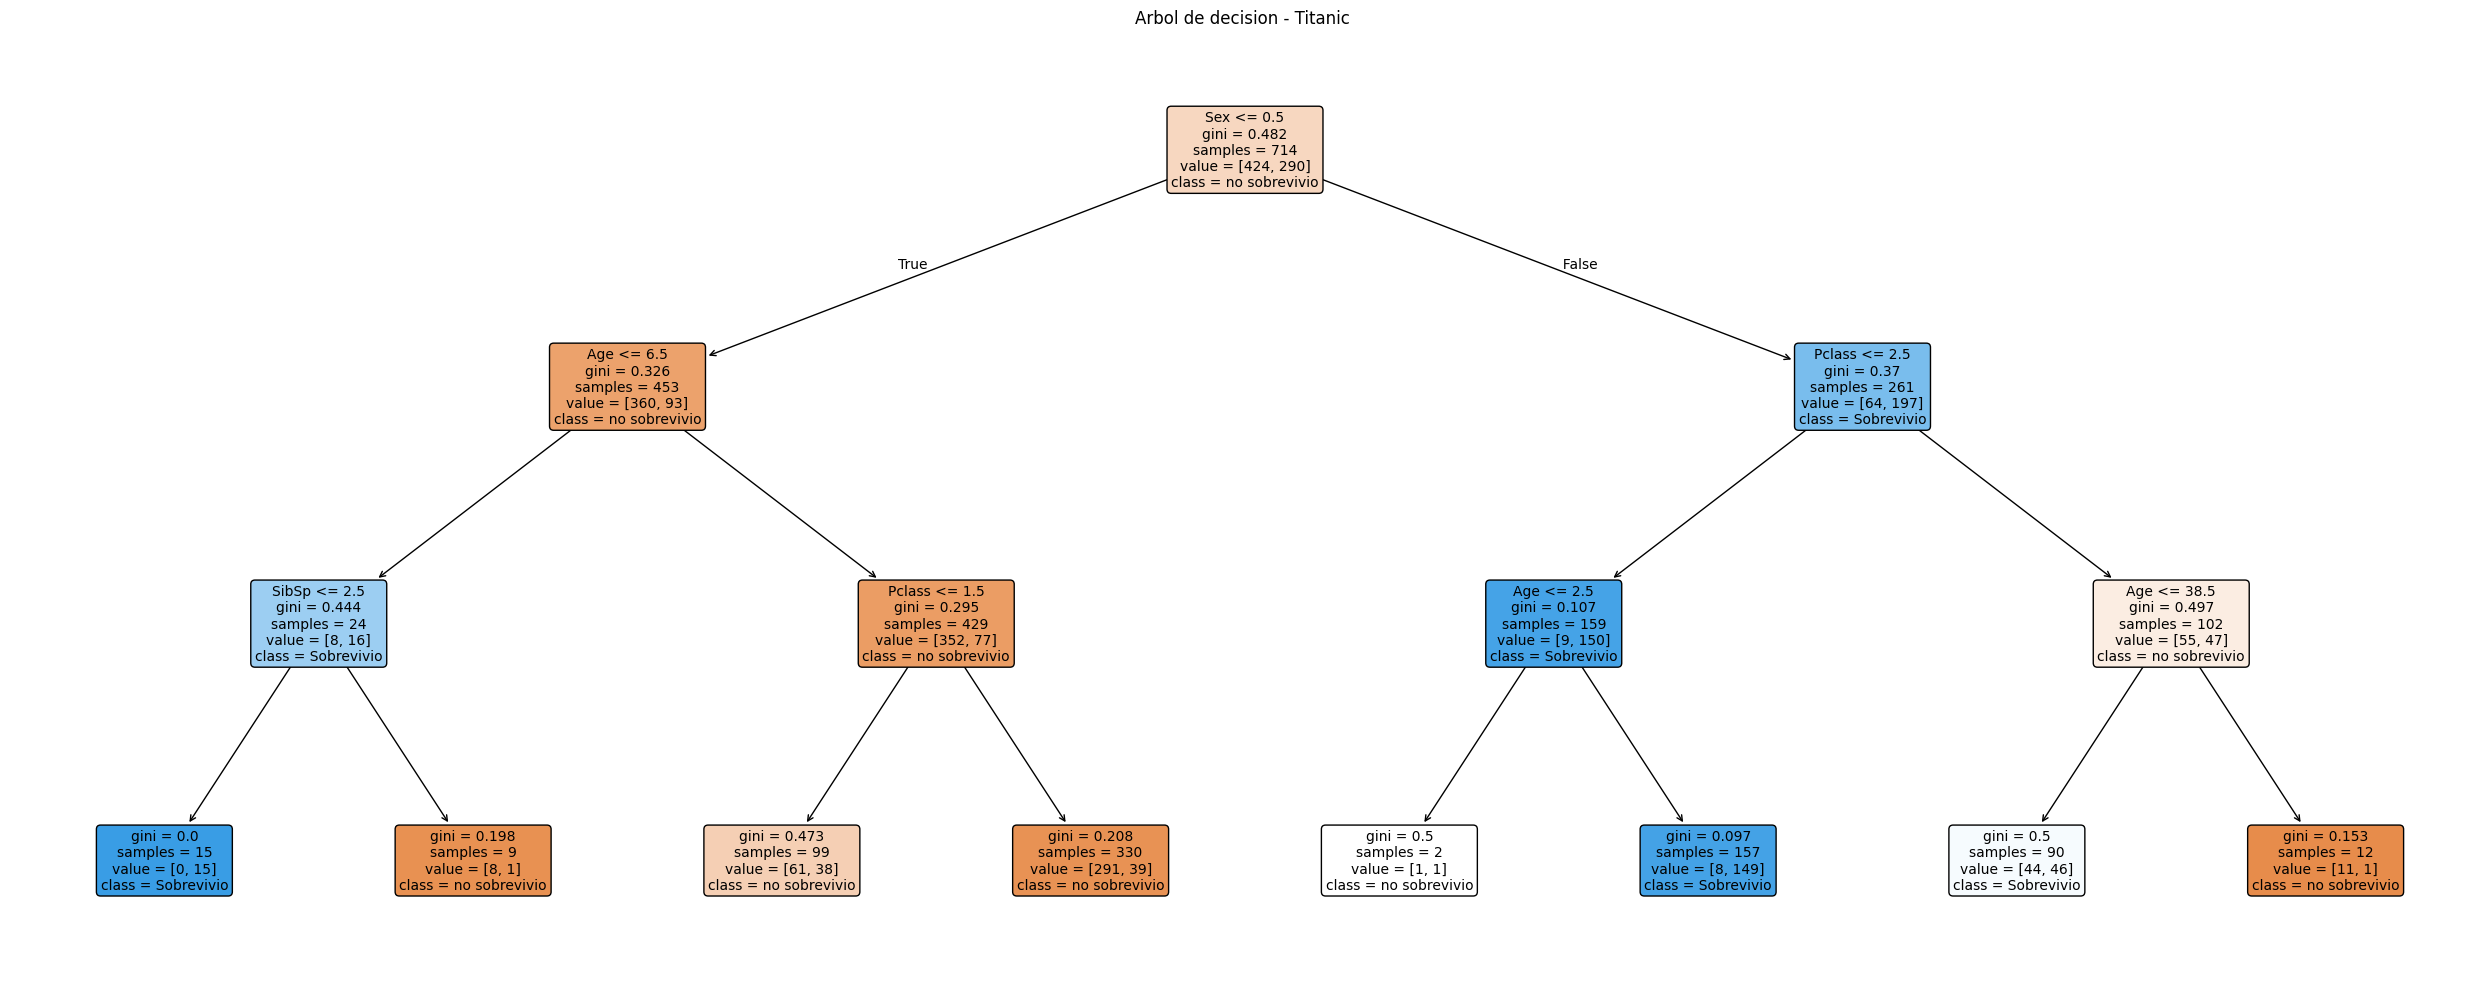

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
PassengerId,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0


In [36]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

input_file = "data/titanic/train.csv"
usecols = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch']

df = pd.read_csv(input_file,usecols = usecols, index_col = "PassengerId", header = 0)
df = df.dropna()
df['Sex'] = df['Sex'].map({'male':0,'female':1})

X=df[['Pclass','Sex','Age','SibSp','Parch']]
Y=df['Survived']

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X,Y)

plt.figure(figsize=(25,10))
tree.plot_tree(clf,
               feature_names=X.columns.tolist(),
               class_names = ['no sobrevivio','Sobrevivio'],
               filled = True,
               rounded =True,
               fontsize = 10)
plt.title("Arbol de decision - Titanic ")
plt.tight_layout()
plt.show()
df.head(5)




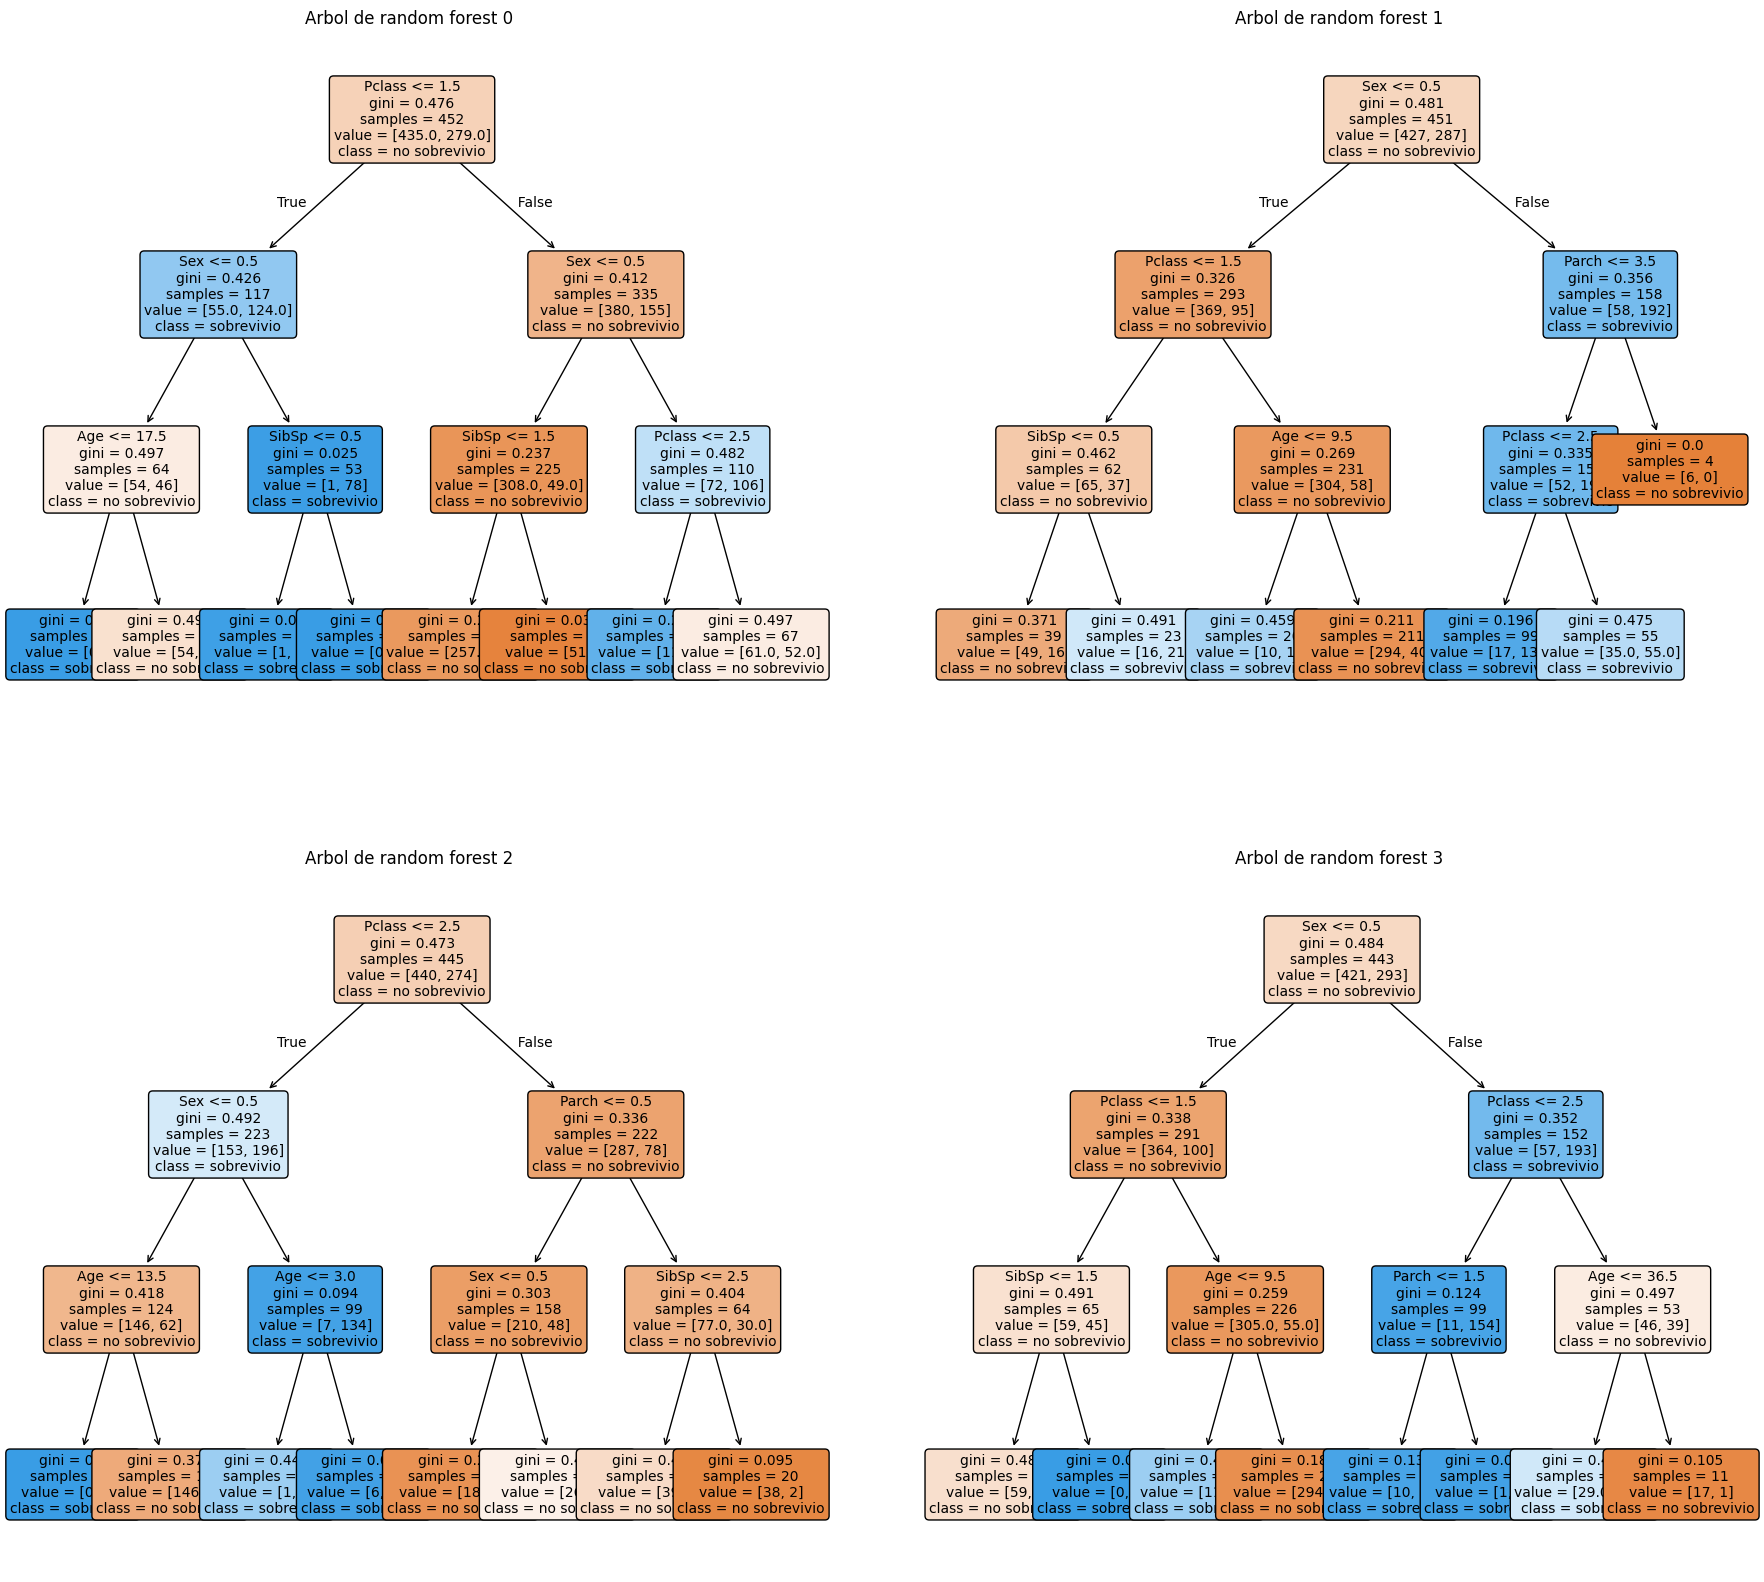

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators =4,
    max_depth=3,
    random_state =42
)
rf.fit(X,Y)


fig, axes = plt.subplots(2,2,figsize=(22,20))
axes = axes.flatten()


for i, estimator in enumerate(rf.estimators_):
    plt.figure(figsize = (16,10))
    tree.plot_tree(estimator,
                   ax=axes[i],
                   feature_names = X.columns.tolist(),
                   class_names = ['no sobrevivio', 'sobrevivio'],
                   filled = True,
                   rounded = True,
                   fontsize = 10)
    
    axes[i].set_title(f"Arbol de random forest {i} ")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

depths = [2, 3, 4, 5]


for d in depths:
    clf = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X, Y)

    print("--- Árbol max_depth =", d, "---")
    for name, score in zip(X.columns, clf.feature_importances_):
        print(f"{name}: {score:.4f}")
    print()


--- Árbol max_depth = 2 ---
Pclass: 0.2071
Sex: 0.7156
Age: 0.0772
SibSp: 0.0000
Parch: 0.0000

--- Árbol max_depth = 3 ---
Pclass: 0.2420
Sex: 0.6096
Age: 0.0942
SibSp: 0.0542
Parch: 0.0000

--- Árbol max_depth = 4 ---
Pclass: 0.2338
Sex: 0.5745
Age: 0.1406
SibSp: 0.0511
Parch: 0.0000

--- Árbol max_depth = 5 ---
Pclass: 0.2185
Sex: 0.5370
Age: 0.1636
SibSp: 0.0809
Parch: 0.0000

